# Basis Vectors Transformation
In this example, we show how to perform transformation on basis vectors. We will show that when we change the basis vectors, the coordinates of points change as well.


Let us start with the canonical/standard basis vectors:

\begin{equation*}
B = 
\begin{pmatrix}
\begin{bmatrix}
1\\
0\\
\end{bmatrix},
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
\end{pmatrix}
\end{equation*}

and generate grid of points from $y=-2$ to $y=1$ and from $x=-2$ to $x=1$ with respect to the canonical basis vectors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-2, 2, 1)
y = np.arange(-2, 2, 1)
xx, yy = np.meshgrid(x, y, sparse=False)
xx = np.reshape(xx,(-1,1))
yy = np.reshape(yy,(-1,1))

In [3]:
a = np.array(list(zip(xx,yy)))
x = a[:,0]
y = a[:,1]
print(x.shape, y.shape)

(16, 1) (16, 1)


In [4]:
index = np.reshape(np.array([i for i in range(a.shape[0])]), (-1,1))
index.shape

(16, 1)

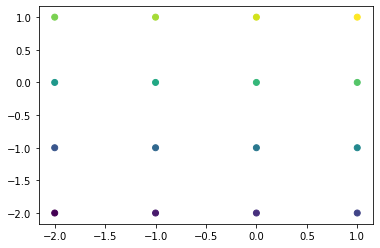

In [5]:
plt.scatter(x, y, c=index, cmap='viridis')
plt.savefig("canonical.png")
plt.show()

## Rotate Transform
Let us rotate the basis vectors by $45^{\circ}$ or $\frac{\pi}{4}$ counter clockwise:

\begin{equation*}
T = 
\begin{bmatrix}
\cos\frac{\pi}{4} & -\sin\frac{\pi}{4} \\
\sin\frac{\pi}{4} & \cos\frac{\pi}{4}\\
\end{bmatrix}
\end{equation*}

In [6]:
import math
T = np.array([[math.cos(math.pi/4), -math.sin(math.pi/4)],[math.sin(math.pi/4), math.cos(math.pi/4)]])

In [7]:
print(T)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [8]:
T.shape

(2, 2)

In [9]:
a = np.reshape(a, (16,2))
b = T.dot(a.T)
b = b.T

The last point in the canonical basis vectors has coordinates:

In [10]:
a.T[:,-1]

array([1, 1])

This is transformed to $\begin{bmatrix}0.0 \\ 1.4\end{bmatrix}$:

In [11]:
b[-1]

array([1.11022302e-16, 1.41421356e+00])

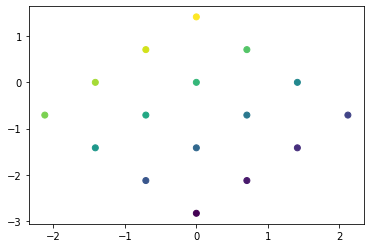

In [12]:
x = b[:,0]
y = b[:,1]
x = np.reshape(x, (-1,1))
y = np.reshape(y, (-1,1))
plt.scatter(x, y, c=index, cmap='viridis')
plt.savefig("rotation.png")
plt.show()

We can see from the plot that the points are correspondingly rotated. For example, in the canonical basis vectors, the *yellow* point:

\begin{equation*}
\mathbf{p} = 
\begin{bmatrix}
1 \\
1
\end{bmatrix}
\end{equation*}

has a new set of coordinates:

\begin{equation*}
\mathbf{p} = 
\begin{bmatrix}
0.0 \\
1.4
\end{bmatrix}
\end{equation*}

## Similarity Transform

Let us apply similarity transform of the form:

\begin{equation*}
T = 
\begin{bmatrix}
\lambda\cos\theta & -\lambda\sin\theta \\
\lambda\sin\theta & \lambda\cos\theta\\
\end{bmatrix}
\end{equation*}

Where $0<\lambda<1.0$ and $0<\theta<\pi$: 

In [13]:
lamb = np.random.rand(1)[0]
theta = math.pi*np.random.rand(1)[0]
T = lamb*np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta), math.cos(theta)]])
print("theta:", theta)
print("lambda:", lamb)

theta: 1.7355675319304884
lambda: 0.5190687404887924


In [14]:
a = np.reshape(a, (16,2))
c = T.dot(a.T)
c = c.T
print(c)

[[ 1.19435906 -0.85379465]
 [ 1.10921795 -0.34175622]
 [ 1.02407685  0.1702822 ]
 [ 0.93893575  0.68232063]
 [ 0.68232063 -0.93893575]
 [ 0.59717953 -0.42689733]
 [ 0.51203843  0.0851411 ]
 [ 0.42689733  0.59717953]
 [ 0.1702822  -1.02407685]
 [ 0.0851411  -0.51203843]
 [ 0.          0.        ]
 [-0.0851411   0.51203843]
 [-0.34175622 -1.10921795]
 [-0.42689733 -0.59717953]
 [-0.51203843 -0.0851411 ]
 [-0.59717953  0.42689733]]


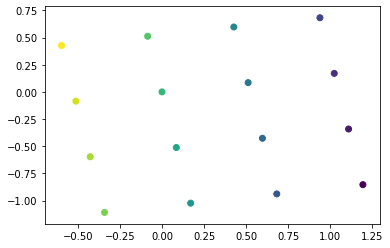

In [15]:
x = c[:,0]
y = c[:,1]
x = np.reshape(x, (-1,1))
y = np.reshape(y, (-1,1))
plt.scatter(x, y, c=index, cmap='viridis')
plt.savefig("similarity.png")
plt.show()

## Affine Transform
Let us apply similarity transform of the form:

\begin{equation*}
T = 
\begin{bmatrix}
\lambda_{11} & \lambda_{12} \\
\lambda_{21} & \lambda_{22}\\
\end{bmatrix}
\end{equation*}

Where $0<\lambda<1.0$.

In [16]:
T = np.random.rand(2,2)
a = np.reshape(a, (16,2))
d = T.dot(a.T)
d = d.T

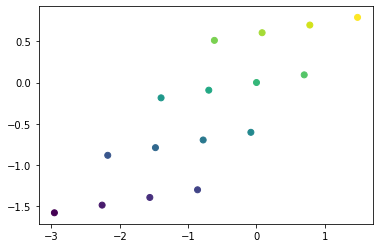

In [17]:
x = d[:,0]
y = d[:,1]
x = np.reshape(x, (-1,1))
y = np.reshape(y, (-1,1))
plt.scatter(x, y, c=index, cmap='viridis')
plt.savefig("affine.png")
plt.show()